In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import csv
import os
import ujson as json
from collections import Counter
from datetime import datetime
import gzip

In [2]:
data_dir = '/nfs/turbo/si-juliame/social-movements/bozarth-keyword-tweets'

In [3]:
issues = ['guns','immigration','lgbtq']
issue_months = {}
issue_months['guns'] = ['2018_03','2018_06']
issue_months['immigration'] = ['2018_06','2018_07']
issue_months['lgbtq'] = ['2018_06','2019_04']

In [4]:
def get_counts_by_date(data_dir):
    date_counts = Counter()
    for fname in os.listdir(data_dir):
        with gzip.open(os.path.join(data_dir,fname)) as f:
            for row in f:
                tweet = json.loads(row)
                created_at = tweet['created_at']
                date = datetime.strptime(created_at, '%a %b %d %H:%M:%S +0000 %Y').strftime('%Y-%m-%d')
                date_counts[date] += 1
    return date_counts

In [7]:
all_date_counts = []
for issue in issue_months.keys():
    issue_data_dir = os.path.join(data_dir,issue)
    for month in issue_months[issue]:
        print(issue,month)
        issue_month_data_dir = os.path.join(issue_data_dir,issue+'_'+month)
        date_counts = get_counts_by_date(issue_month_data_dir)
        for date in date_counts:
            all_date_counts.append([issue,month,date,date_counts[date]])

guns 2018_03
guns 2018_06
immigration 2018_06
immigration 2018_07
lgbtq 2018_06
lgbtq 2019_04


In [53]:
all_date_counts

[['guns', '2018_03', '2018-03-10', 19148],
 ['guns', '2018_03', '2018-03-11', 13950],
 ['guns', '2018_03', '2018-03-21', 15806],
 ['guns', '2018_03', '2018-03-22', 15738],
 ['guns', '2018_03', '2018-03-23', 21210],
 ['guns', '2018_03', '2018-03-24', 78532],
 ['guns', '2018_03', '2018-03-20', 18807],
 ['guns', '2018_03', '2018-03-05', 22948],
 ['guns', '2018_03', '2018-03-06', 17886],
 ['guns', '2018_03', '2018-03-08', 19450],
 ['guns', '2018_03', '2018-03-09', 18723],
 ['guns', '2018_03', '2018-03-07', 19636],
 ['guns', '2018_03', '2018-03-26', 37332],
 ['guns', '2018_03', '2018-03-27', 35539],
 ['guns', '2018_03', '2018-03-03', 15644],
 ['guns', '2018_03', '2018-03-04', 18330],
 ['guns', '2018_03', '2018-03-28', 25864],
 ['guns', '2018_03', '2018-03-13', 15615],
 ['guns', '2018_03', '2018-03-14', 991],
 ['guns', '2018_03', '2018-03-25', 61451],
 ['guns', '2018_03', '2018-03-12', 18611],
 ['guns', '2018_03', '2018-03-29', 45300],
 ['guns', '2018_03', '2018-03-30', 39811],
 ['guns', '20

In [8]:
df = pd.DataFrame(all_date_counts,columns=['issue','month','date','count'])

In [9]:
df

,issue,month,date,count
0,guns,2018_03,2018-03-10,19148
1,guns,2018_03,2018-03-11,13950
2,guns,2018_03,2018-03-21,15806
3,guns,2018_03,2018-03-22,15738
4,guns,2018_03,2018-03-23,21210
...,...,...,...,...
163,lgbtq,2019_04,2019-04-08,3533
164,lgbtq,2019_04,2019-04-20,2346
165,lgbtq,2019_04,2019-04-09,3180
166,lgbtq,2019_04,2019-04-24,3097


In [57]:
df['count'].sum()

1852922

In [59]:
df.groupby('issue').agg('sum').reset_index()

,issue,count
0,guns,822161
1,immigration,763060
2,lgbtq,267701


In [10]:
df_month_counts = df.groupby(by=['issue','month']).agg('sum').reset_index()

In [11]:
df_month_counts

,issue,month,count
0,guns,2018_03,633027
1,guns,2018_06,189134
2,immigration,2018_06,513284
3,immigration,2018_07,249776
4,lgbtq,2018_06,172006
5,lgbtq,2019_04,95695


In [74]:
protest_activity = []
for i,row in df_month_counts.iterrows():
    if row['issue'] == 'guns' and row['month'] == '2018_03':
        protest_activity.append('high')
    elif row['issue'] == 'immigration' and row['month'] == '2018_06':
        protest_activity.append('high')
    elif row['issue'] == 'lgbtq' and row['month'] == '2018_06':
        protest_activity.append('high')
    else:
        protest_activity.append('average')
df_month_counts['protest_activity'] = protest_activity

In [75]:
df_month_counts

,issue,month,count,protest_activity
0,guns,2018_03,633027,high
1,guns,2018_06,189134,average
2,immigration,2018_06,513284,high
3,immigration,2018_07,249776,average
4,lgbtq,2018_06,172006,high
5,lgbtq,2019_04,95695,average


<AxesSubplot:xlabel='issue', ylabel='count'>

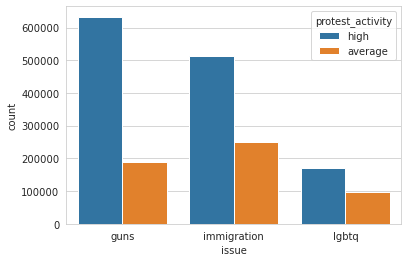

In [77]:
sns.set_style('whitegrid')
sns.barplot(x='issue',y='count',hue='protest_activity',data=df_month_counts)

In [78]:
df

,issue,month,date,count
0,guns,2018_03,2018-03-10,19148
1,guns,2018_03,2018-03-11,13950
2,guns,2018_03,2018-03-21,15806
3,guns,2018_03,2018-03-22,15738
4,guns,2018_03,2018-03-23,21210
...,...,...,...,...
163,lgbtq,2019_04,2019-04-08,3533
164,lgbtq,2019_04,2019-04-20,2346
165,lgbtq,2019_04,2019-04-09,3180
166,lgbtq,2019_04,2019-04-24,3097


<AxesSubplot:xlabel='date', ylabel='count'>

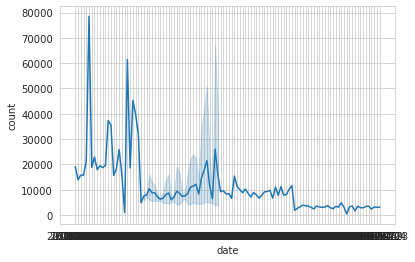

In [79]:
sns.lineplot(x='date',y='count',data=df)

In [81]:
df['date_dt'] = pd.to_datetime(df['date'])

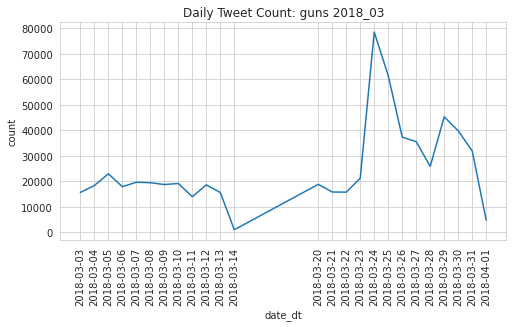

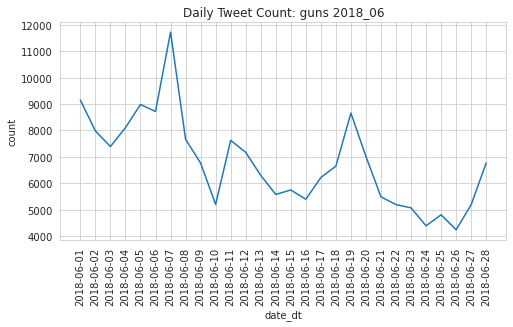

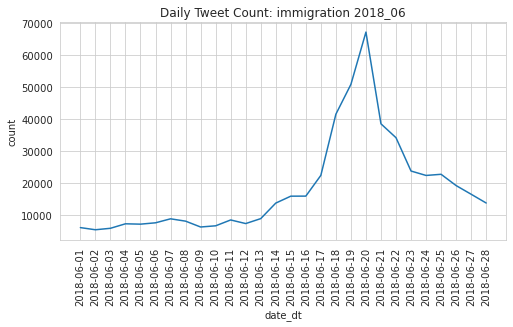

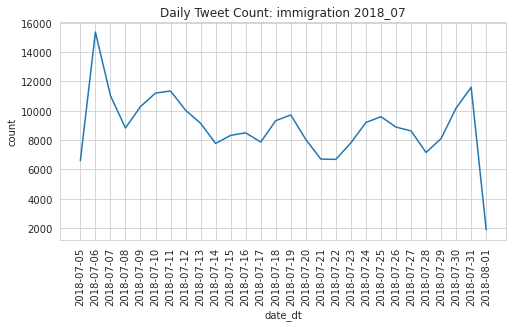

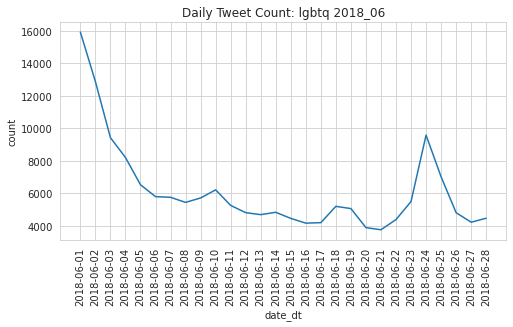

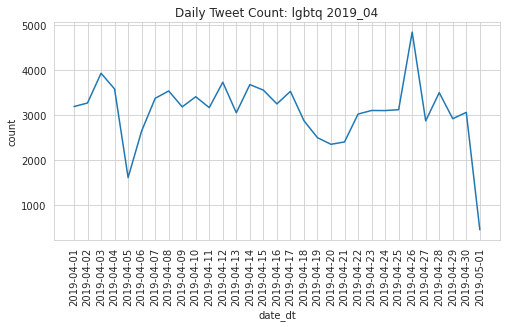

In [103]:
for issue in issues:
    for month in issue_months[issue]:
        df_sub = df[(df['issue'] == issue) & (df['month'] == month)]
        plt.figure(figsize=(8,4))
        ax = sns.lineplot(x='date_dt',y='count',data=df_sub)
        plt.xticks(rotation=90)
        ax.set_xticks(df_sub['date_dt'].sort_values())
        plt.title(f'Daily Tweet Count: {issue} {month}')
        #ax.set_xticklabels([label1, label2, ...])

In [94]:
df_sub['date_dt'].sort_values()

145   2019-04-01
138   2019-04-02
139   2019-04-03
144   2019-04-04
158   2019-04-05
137   2019-04-06
162   2019-04-07
163   2019-04-08
165   2019-04-09
151   2019-04-10
147   2019-04-11
148   2019-04-12
146   2019-04-13
140   2019-04-14
141   2019-04-15
156   2019-04-16
157   2019-04-17
149   2019-04-18
150   2019-04-19
164   2019-04-20
143   2019-04-21
142   2019-04-22
167   2019-04-23
166   2019-04-24
152   2019-04-25
153   2019-04-26
161   2019-04-27
159   2019-04-28
160   2019-04-29
154   2019-04-30
155   2019-05-01
Name: date_dt, dtype: datetime64[ns]

In [100]:
df.to_csv('/nfs/turbo/si-juliame/social-movements/data_stats/daily_counts.tsv',sep='\t')

In [104]:
df_month_counts

,issue,month,count,protest_activity
0,guns,2018_03,633027,high
1,guns,2018_06,189134,average
2,immigration,2018_06,513284,high
3,immigration,2018_07,249776,average
4,lgbtq,2018_06,172006,high
5,lgbtq,2019_04,95695,average


In [60]:
def get_tweet_type_counts_per_file(fname):
    tweet_type_counts = Counter()
    hashtags = Counter()
    mentions = Counter()
    with gzip.open(os.path.join(data_dir,fname)) as f:
        for row in f:
            results = {}
            tweet = json.loads(row)
            entities = tweet['entities']
            if 'extended_tweet' in tweet.keys():
                entities = tweet['extended_tweet']['entities']
            tweet_hashtags = [h['text'] for h in entities['hashtags']]
            tweet_mentions = [m['screen_name'] for m in entities['user_mentions']]
            
            for h in tweet_hashtags:
                hashtags[h] += 1
            for m in tweet_mentions:
                mentions[m] += 1
            if len(tweet_hashtags) > 0:
                tweet_type_counts['contains_hashtag'] += 1
            if len(tweet_mentions) > 0:
                tweet_type_counts['contains_mention'] += 1
            if tweet['in_reply_to_status_id_str'] != None:
                tweet_type_counts['num_replies'] += 1
            if tweet['is_quote_status'] == True:
                tweet_type_counts['num_quotes'] += 1
            if tweet['in_reply_to_status_id_str'] == None and tweet['is_quote_status'] == False:
                tweet_type_counts['num_broadcast'] += 1
    results = {}
    results['tweet_type_counts'] = tweet_type_counts
    results['mentions'] = mentions
    results['hashtags'] = hashtags
    return results

In [73]:
def get_tweet_type_all_data(data_dir):
    all_counts = {}
    for issue in issue_months.keys():
        all_counts[issue] = {}
        issue_data_dir = os.path.join(data_dir,issue)
        for month in issue_months[issue]:
            print(issue,month)
            all_counts[issue][month] = {}
            issue_month_data_dir = os.path.join(issue_data_dir,issue+'_'+month)
            for i,fname in enumerate(os.listdir(issue_month_data_dir)):
                full_path = os.path.join(issue_month_data_dir,fname)
                file_counts = get_tweet_type_counts_per_file(full_path)
                for key in file_counts.keys():
                    if key not in all_counts[issue][month]:
                        all_counts[issue][month][key] = Counter()
                    all_counts[issue][month][key] += file_counts[key]
    return all_counts

In [74]:
all_counts = get_tweet_type_all_data(data_dir)

guns 2018_03
guns 2018_06
immigration 2018_06
immigration 2018_07
lgbtq 2018_06
lgbtq 2019_04


In [77]:
with open('/nfs/turbo/si-juliame/social-movements/data_stats/tweet_type_counts.json','w') as f:
    json.dump(all_counts,f)

In [3]:
with open('/nfs/turbo/si-juliame/social-movements/data_stats/tweet_type_counts.json') as f:
    all_counts = json.load(f) 

In [4]:
all_counts

{'guns': {'2018_03': {'tweet_type_counts': {'contains_hashtag': 205898,
    'contains_mention': 465317,
    'num_broadcast': 204555,
    'num_replies': 375016,
    'num_quotes': 55609},
   'mentions': {'NRA': 68110,
    'krassenstein': 1382,
    'StephMillerShow': 73,
    'EastCincyMom': 24,
    'cameraNbrush': 38,
    'LoveEachother14': 133,
    'JoeDodd16': 7,
    'DLoesch': 26025,
    'ClassicFirearm': 4563,
    'Sootch00': 3791,
    'activist360': 83,
    'TomWellborn': 130,
    'SenatorObvious': 7,
    'mchooyah': 214,
    'davidhogg111': 119031,
    'wiseman_rhonda': 1,
    'Mkwood1952': 26,
    'StokedToLive': 3,
    'KyleKashuv': 50592,
    'realDonaldTrump': 25372,
    'IngrahamAngle': 20040,
    'RKBA_Atty': 23,
    'Cbailey5151': 59,
    'CaptParker1775': 78,
    'TheSandmanSlim': 23,
    'WaffleWedgie': 66,
    'bobby1time': 69,
    'SaarioBrandon': 108,
    'Emma4Change': 34874,
    'corennacornwell': 11,
    'TAGOS22': 88,
    'klc4trump': 6,
    'glamelegance': 25,
    '

In [68]:
tweet_type_counts = []
for issue in all_counts:
    for month in all_counts[issue]:
        issue_month_counts = {}
        issue_month_counts['issue'] = issue
        issue_month_counts['month'] = month
        for tweet_type in all_counts[issue][month]['tweet_type_counts']:
            issue_month_counts[tweet_type] = all_counts[issue][month]['tweet_type_counts'][tweet_type]
        tweet_type_counts.append(issue_month_counts)
df_tweet_types = pd.DataFrame(tweet_type_counts)

In [71]:
pd.DataFrame(df_tweet_types.sum(axis=0))

,0
issue,gunsgunsimmigrationimmigrationlgbtqlgbtq
month,2018_032018_062018_062018_072018_062019_04
contains_hashtag,601690
contains_mention,1176728
num_broadcast,739867
num_replies,924712
num_quotes,193932


In [6]:
df_tweet_types = df_tweet_types.groupby(by='issue').agg('sum').reset_index()
df_tweet_types = pd.melt(df_tweet_types,id_vars=['issue'])
df_tweet_types.columns = ['Issue','Tweet Type','Count']

In [7]:
df_tweet_types

,Issue,Tweet Type,Count
0,guns,contains_hashtag,260419
1,immigration,contains_hashtag,237077
2,lgbtq,contains_hashtag,104194
3,guns,contains_mention,608783
4,immigration,contains_mention,465567
5,lgbtq,contains_mention,102378
6,guns,num_broadcast,258683
7,immigration,num_broadcast,317581
8,lgbtq,num_broadcast,163603
9,guns,num_replies,495608


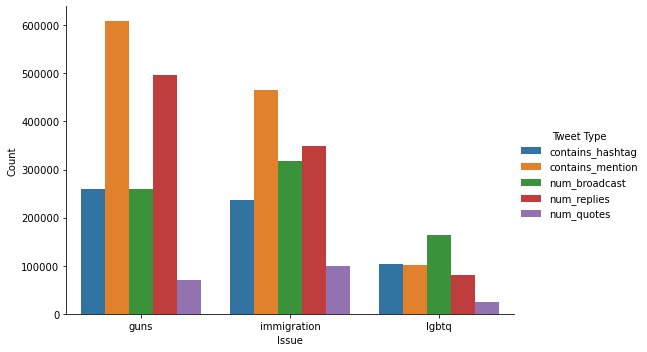

In [8]:
sns.catplot(x='Issue',y='Count',data=df_tweet_types,hue='Tweet Type',kind='bar',aspect=1.5)

In [4]:
hashtag_counts = []
for issue in all_counts:
    for month in all_counts[issue]:
        for hashtag in all_counts[issue][month]['hashtags']:
            entry = {}
            entry['issue'] = issue
            entry['month'] = month
            entry['hashtag'] = hashtag
            entry['count'] = all_counts[issue][month]['hashtags'][hashtag]
            hashtag_counts.append(entry)
df_hashtag = pd.DataFrame(hashtag_counts)

In [5]:
mention_counts = []
for issue in all_counts:
    for month in all_counts[issue]:
        for mention in all_counts[issue][month]['mentions']:
            entry = {}
            entry['issue'] = issue
            entry['month'] = month
            entry['mention'] = mention
            entry['count'] = all_counts[issue][month]['mentions'][mention]
            mention_counts.append(entry)
df_mention = pd.DataFrame(mention_counts)

In [6]:
df_hashtag_agg = df_hashtag.groupby('hashtag').agg('sum').reset_index()
df_hashtag_agg['rank'] = df_hashtag_agg['count'].rank(ascending=False,method='first')


In [10]:
df_hashtag_agg.sort_values(by='rank')[:30]

,hashtag,count,rank
68305,MarchForOurLives,63673,1.0
65568,MAGA,27810,2.0
76301,NeverAgain,22596,3.0
984,2A,22203,4.0
36572,FamiliesBelongTogether,21280,5.0
87667,PrideMonth,17722,6.0
74243,NRA,15917,7.0
5916,AmericaFirst,12672,8.0
117609,Twibbon,12492,9.0
58642,KeepFamiliesTogether,11872,10.0


<AxesSubplot:xlabel='rank', ylabel='count'>

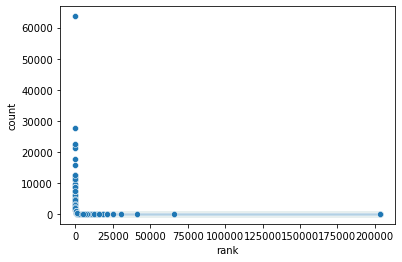

In [8]:
sns.scatterplot(x='rank',y='count',data=df_hashtag_agg)

In [12]:
df_mention_agg = df_mention.groupby('mention').agg('sum').reset_index()
df_mention_agg['rank'] = df_mention_agg['count'].rank(ascending=False,method='first')


In [13]:
df_mention_agg.sort_values(by='rank')[:30]

,mention,count,rank
296231,davidhogg111,157740,1.0
397760,realDonaldTrump,104538,2.0
162535,NRA,91160,3.0
128765,KyleKashuv,60836,4.0
73642,Emma4Change,38189,5.0
55326,DLoesch,31635,6.0
174693,POTUS,29500,7.0
424647,tedcruz,29256,8.0
281585,cameron_kasky,27703,9.0
81286,FoxNews,26450,10.0


<AxesSubplot:xlabel='rank', ylabel='count'>

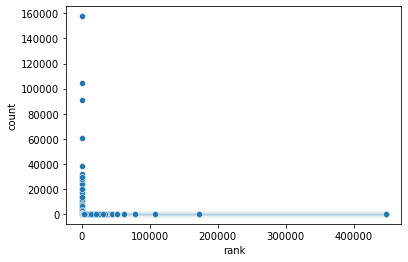

In [14]:
sns.scatterplot(x='rank',y='count',data=df_mention_agg)

In [24]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 353 kB 16.7 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350826 sha256=86eb2277c71ac4f0c54377fd4a55d0e0c4ce8e190da258aa37447c49a453d604
  Stored in directory: /home/juliame/.cache/pip/wheels/d5/c5/45/6c3b2e538c10e9667495d6bff243ee0a296c3c246478007df3
Successfully built emoji


In [29]:
import emoji

In [50]:
def is_flag_emoji(c):
    return "\U0001F1E6\U0001F1E8" <= c <= "\U0001F1FF\U0001F1FC" or c in ["\U0001F3F4\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f", "\U0001F3F4\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f", "\U0001F3F4\U000e0067\U000e0062\U000e0077\U000e006c\U000e0073\U000e007f"]

In [60]:
user_counts = Counter()
emoji_counts = Counter()
for issue in issue_months.keys():
    issue_data_dir = os.path.join(data_dir,issue)
    for month in issue_months[issue]:
        issue_month_data_dir = os.path.join(issue_data_dir,issue+'_'+month)
        for fname in os.listdir(issue_month_data_dir):
            with gzip.open(os.path.join(issue_month_data_dir,fname)) as f:
                for row in f:
                    tweet = json.loads(row)
                    user = tweet['user']['screen_name']
                    user_counts[user] += 1
                    
        


In [64]:
user_counts.most_common(20)

[('AMarch4OurLives', 2039),
 ('openletterbot', 1421),
 ('RobertPefferJr', 928),
 ('nuuzfeed', 841),
 ('Milvio_Diaz', 551),
 ('jonnyjo73027005', 508),
 ('smartvalueblog', 505),
 ('PVistalli', 493),
 ('ImBenSharpie', 456),
 ('ClassicDeepCuts', 451),
 ('Zebusrugby', 384),
 ('StephenWLaPoint', 382),
 ('DrLindaShelton', 378),
 ('SomethingPurpl1', 343),
 ('SafetyPinDaily', 340),
 ('TomthunkitsMind', 319),
 ('Susan_Larson_TN', 312),
 ('haberdasherson', 292),
 ('rjoseph7777', 292),
 ('equalearth', 287)]

In [ ]:
user_rank = []
for i,u in enumerate(user_counts.most_common()):
    entry = {}
    entry['rank'] = i+1
    entry['user'] = u[0]
    entry['d']
    user_rank.append([i+1,u[0],u[1]])

In [57]:
text = '🇺🇸🇺🇸CEO, entrepreneur, consultant, entertainment specialist, businessman. Political Follower.'
''.join(c for c in text if c in emoji.EMOJI_DATA or is_flag_emoji(c))


'🇺🇸🇺🇸'

In [31]:
emoji.emojize('Python is :thumbs_up:')

'Python is 👍'

In [33]:
emoji.emoji_count('Python is 👍')

1

In [48]:
tweet['user']['description']

'🇺🇸🇺🇸CEO, entrepreneur, consultant, entertainment specialist, businessman. Political Follower.'

In [66]:
tweet

{'created_at': 'Wed Apr 24 03:59:10 +0000 2019',
 'id': 1120899959891558401,
 'id_str': '1120899959891558401',
 'text': 'hahahhahahhahaha scared as fuck for tomorrow should i just fake being this girls friend so she can leave me alone e… https://t.co/sg7VztUwK4',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': True,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 977690480690515968,
  'id_str': '977690480690515968',
  'name': 'Maya💫',
  'screen_name': 'fallenchrome',
  'location': 'bi girls+, switch, avi not me',
  'url': 'https://curiouscat.me/fallenchrome',
  'description': '15,, i’m single laid easeeeee 18+ dni,, Hyuckie uwu,, dms always open',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 198,
  'friends_count': 95,
  'listed_count': 0,
  'fa